<a href="https://colab.research.google.com/github/luisfernandogbraga/ANALISE_DE_PRODUCAO_DULOREN/blob/main/produ%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install odfpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160672 sha256=cf37cde8ad75c087b1ec7ceac59ab7bb27b611a5ebf8cb2afd89ddacdad29eff
  Stored in directory: /root/.cache/pip/wheels/c8/2e/95/90d94fe33903786937f3b8c33dd88807f792359c6424b40469
Successfully built odfpy


In [2]:
from google.colab import files
from re import U
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:

upload= files.upload()
arquivo= next(iter(upload))
df= pd.read_excel(arquivo)



Saving controle.ods to controle.ods


In [4]:
display(df)

,DATA,ARTIGO,MAQUINA,PESO,METRAGEM
0,2023-10-30,BALLI 16,817,2.4,998.40
1,2023-10-30,BELLES 15,801,6.0,1284.00
2,2023-10-30,MURITI 10,805,18.6,3534.00
3,2023-10-30,BALLI 16,815,2.4,998.40
4,2023-10-30,BELLES 15,814,7.8,1669.20
...,...,...,...,...,...
230,2023-11-21,MURITI 10,813,15.0,2850.00
231,2023-11-21,BELLES 15,808,4.8,1027.20
232,2023-11-21,CÓS 16,816,11.4,1354.89
233,2023-11-21,NEW CONF,908,24.0,1614.96


In [ ]:
# del df['PEÇA'] EXCLUI A COLUNA PEÇA. OBS: DOCUMENTO ATUALIZADO, COLUNA NÃO EXISTE MAIS.

In [ ]:
# df.to_excel('produção.xlsx', index=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATA      235 non-null    datetime64[ns]
 1   ARTIGO    235 non-null    object        
 2   MAQUINA   235 non-null    int64         
 3   PESO      235 non-null    float64       
 4   METRAGEM  235 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 9.3+ KB


In [6]:
df['ARTIGO'].describe()

count           235
unique           17
top       BELLES 15
freq             61
Name: ARTIGO, dtype: object

- Há 235 entradas na coluna 'ARTIGO'.
- Existem 17 valores únicos nesta coluna.
- O valor mais frequente na coluna 'ARTIGO' é 'BELLES 15.
- 'BELLES 15' aparece 61 vezes, indicando que é o valor mais comum e ocorre com mais frequência.

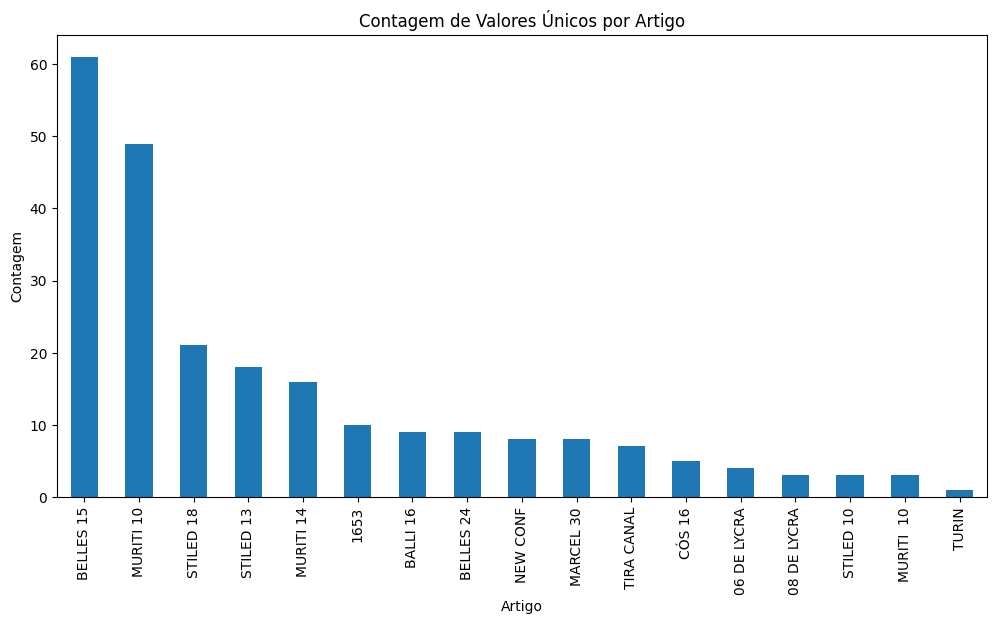

In [7]:
artigo_counts = df['ARTIGO'].value_counts()
plt.figure(figsize=(12,6))
artigo_counts.plot(kind='bar')
plt.title('Contagem de Valores Únicos por Artigo')
plt.xlabel('Artigo')
plt.ylabel('Contagem')
plt.show()

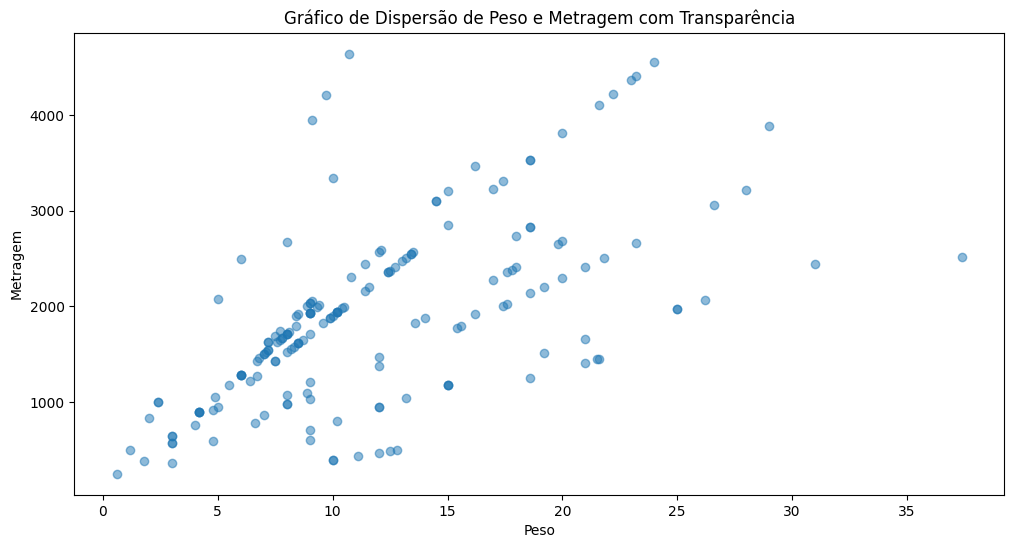

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df['PESO'], df['METRAGEM'], alpha=0.5)
plt.title('Gráfico de Dispersão de Peso e Metragem com Transparência')
plt.xlabel('Peso')
plt.ylabel('Metragem')
plt.show()

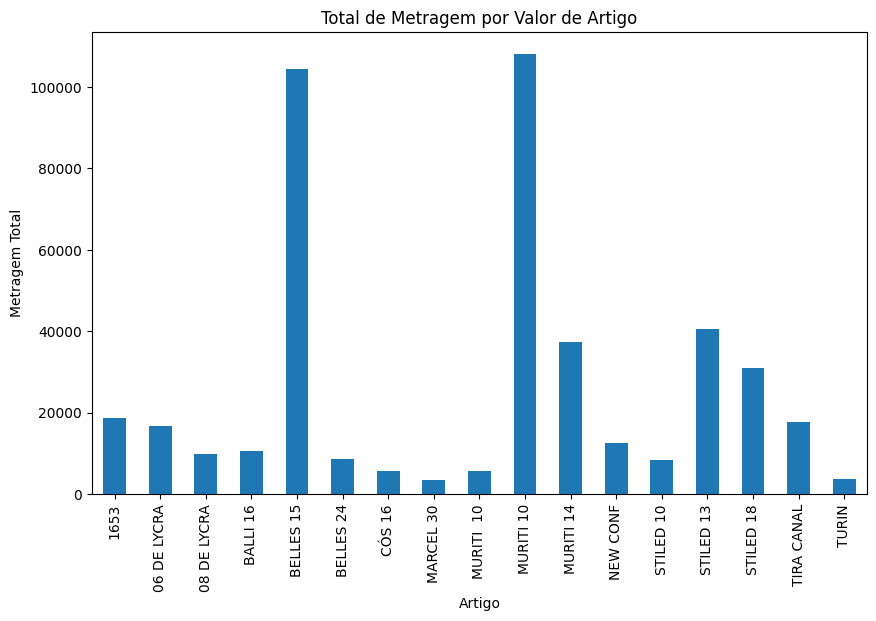

O valor da coluna ARTIGO com a maior metragem total é: MURITI 10


In [8]:
# Calcular a metragem total para cada valor único na coluna 'ARTIGO'
metragem_por_artigo = df.groupby('ARTIGO')['METRAGEM'].sum()

# Encontrar o valor da coluna 'ARTIGO' com a maior metragem
artigo_maior_metragem = metragem_por_artigo.idxmax()

# Plotar um gráfico de barras ou um gráfico de pizza para visualizar as metragens por valor da coluna 'ARTIGO'
plt.figure(figsize=(10, 6))
metragem_por_artigo.plot(kind='bar')
plt.title('Total de Metragem por Valor de Artigo')
plt.xlabel('Artigo')
plt.ylabel('Metragem Total')
plt.show()

# Imprimir o valor da coluna 'ARTIGO' com a maior metragem
print(f'O valor da coluna ARTIGO com a maior metragem total é: {artigo_maior_metragem}')


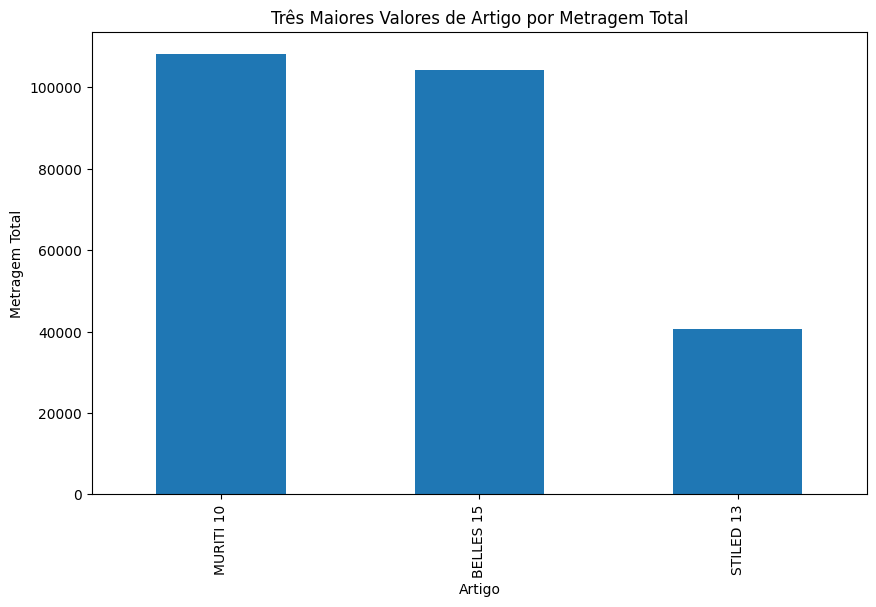

Os três valores da coluna 'ARTIGO' com a maior metragem são:
ARTIGO
MURITI 10    108110.0
BELLES 15    104346.4
STILED 13     40583.5
Name: METRAGEM, dtype: float64


In [9]:
# Calcular a metragem total para cada valor único na coluna 'ARTIGO'
metragem_por_artigo = df.groupby('ARTIGO')['METRAGEM'].sum()

# Selecionar os três valores da coluna 'ARTIGO' com a maior metragem
top_artigos = metragem_por_artigo.nlargest(3)

# Plotar um gráfico de barras para os três valores da coluna 'ARTIGO' com a maior metragem
plt.figure(figsize=(10, 6))
top_artigos.plot(kind='bar')
plt.title('Três Maiores Valores de Artigo por Metragem Total')
plt.xlabel('Artigo')
plt.ylabel('Metragem Total')
plt.show()

# Imprimir os três valores da coluna 'ARTIGO' com a maior metragem
print("Os três valores da coluna 'ARTIGO' com a maior metragem são:")
print(top_artigos)

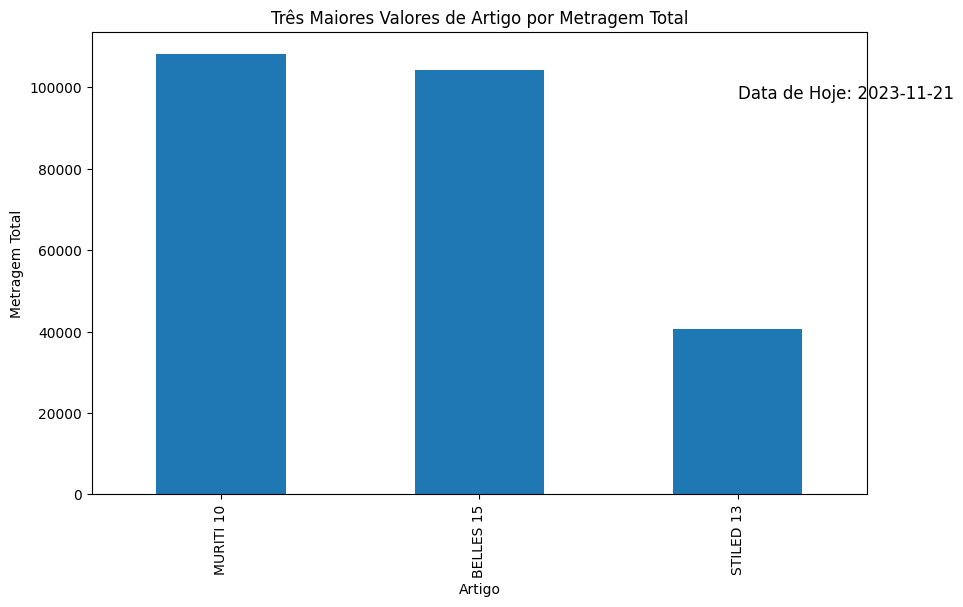

Os três valores da coluna 'ARTIGO' com a maior metragem são:
ARTIGO
MURITI 10    108110.0
BELLES 15    104346.4
STILED 13     40583.5
Name: METRAGEM, dtype: float64


In [10]:
# Calcular a metragem total para cada valor único na coluna 'ARTIGO'
metragem_por_artigo = df.groupby('ARTIGO')['METRAGEM'].sum()

# Selecionar os três valores da coluna 'ARTIGO' com a maior metragem
top_artigos = metragem_por_artigo.nlargest(3)

# Plotar um gráfico de barras para os três valores da coluna 'ARTIGO' com a maior metragem
plt.figure(figsize=(10, 6))
top_artigos.plot(kind='bar')
plt.title('Três Maiores Valores de Artigo por Metragem Total')
plt.xlabel('Artigo')
plt.ylabel('Metragem Total')

# Adicionar a data de hoje no gráfico
data_hoje = datetime.now().strftime('%Y-%m-%d')
plt.text(2, max(top_artigos) * 0.9, f"Data de Hoje: {data_hoje}", fontsize=12, ha='left')

plt.show()

# Imprimir os três valores da coluna 'ARTIGO' com a maior metragem
print("Os três valores da coluna 'ARTIGO' com a maior metragem são:")
print(top_artigos)

<ipython-input-11-c2c03d2fa2a8>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='MAQUINA', y='METRAGEM', data=df_belles15, ci=None, palette="viridis")


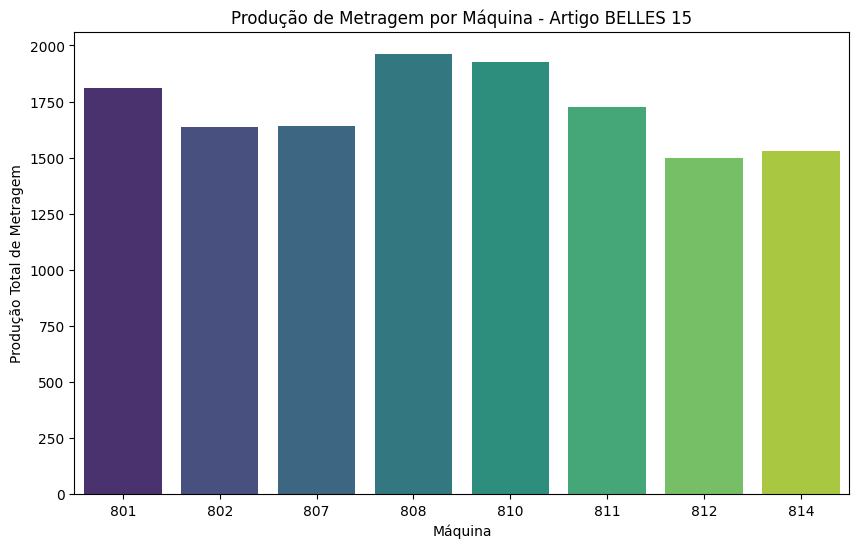

In [11]:
# Filtro para o artigo BELLES 15
df_belles15 = df[df['ARTIGO'] == 'BELLES 15']

# Plotar gráfico de barras para a produção de METRAGEM por máquina para o artigo BELLES 15
plt.figure(figsize=(10, 6))
sns.barplot(x='MAQUINA', y='METRAGEM', data=df_belles15, ci=None, palette="viridis")
plt.title('Produção de Metragem por Máquina - Artigo BELLES 15')
plt.xlabel('Máquina')
plt.ylabel('Produção Total de Metragem')
plt.show()



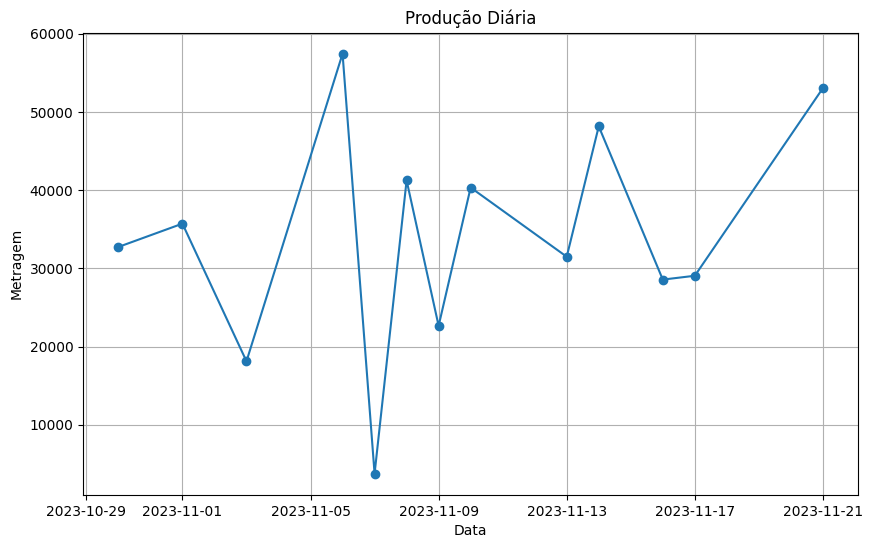

In [14]:
producao_diaria = df.groupby('DATA')['METRAGEM'].sum().reset_index()

# Plote o gráfico
plt.figure(figsize=(10, 6))
plt.plot(producao_diaria['DATA'], producao_diaria['METRAGEM'], marker='o')
plt.title('Produção Diária')
plt.xlabel('Data')
plt.ylabel('Metragem')
plt.grid(True)
plt.show()

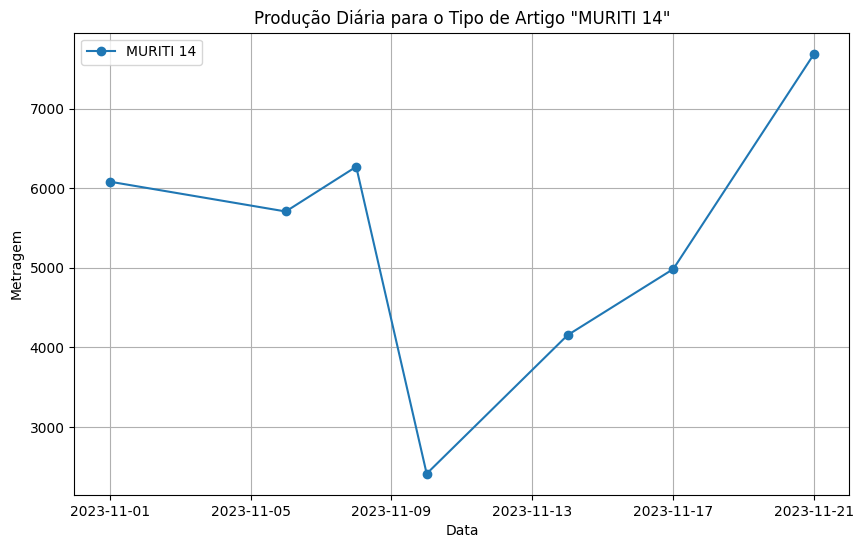

In [17]:
# Filtre os dados apenas para o tipo de artigo "Belles"
dados = df[df['ARTIGO'] == 'MURITI 14']

# Agrupe os dados por data e some a metragem diária
producao_diaria = dados.groupby('DATA')['METRAGEM'].sum().reset_index()

# Plote o gráfico
plt.figure(figsize=(10, 6))
plt.plot(producao_diaria['DATA'], producao_diaria['METRAGEM'], marker='o', label='MURITI 14')
plt.title('Produção Diária para o Tipo de Artigo "MURITI 14"')
plt.xlabel('Data')
plt.ylabel('Metragem')
plt.legend()
plt.grid(True)
plt.show()